In [0]:
import re
import pandas as pd

In [0]:
# clean the lyrics
# require lyrics.csv
# remove all nan rows and strange characters in lyrics colounm
# return clean df
def clean_lyrics():
  song = pd.read_csv("/content/drive/My Drive/NLP/W4/lyrics.csv")
  song=song[song.year>1000]
  clean_song=song.dropna(subset=['lyrics']).replace({'lyrics': '[^A-Za-z ]',} ,' ', regex=True)
  #clean_song = song.replace({'lyrics': '[^A-Za-z ]',} ,' ', regex=True)
  clean_song['lyrics'] = clean_song['lyrics'].str.upper().str.split()
  #clean_song['lyrics'] = clean_song['lyrics'].str.split()
  return clean_song
song=clean_lyrics()


In [0]:
# create 2 list of word one pos one neg
# this function is require for inquireraugmented.xls
# more info search Harvard IV-4
def creat_dic():
  dic=pd.read_excel("/content/drive/My Drive/NLP/W4/inquireraugmented.xls",encoding='utf-8')
  dic=dic.loc[:,['Entry','Positiv','Negativ']]#select necessry coloumn
  dic1=dic.dropna(thresh=2)#remove rows are no emotion
  dic1=dic1.dropna(subset=['Entry'])#remove entry value nan
  pos_dic=dic1[dic1.Positiv == 'Positiv']
  neg_dic=dic1[dic1.Negativ == 'Negativ']
  Pos_list =[] 
  Neg_list =[]
  for rows in pos_dic.itertuples(): 
    Pos_list.append(re.sub(r'[^A-Z]*', '', rows.Entry)) #remove character
  for rows in neg_dic.itertuples(): 
    Neg_list.append(re.sub(r'[^A-Z]*', '', str(rows.Entry))) #unknow why we have no string in this
  return [Pos_list, Neg_list]
##may try to use oop method

In [0]:
#function sentiment_scorer
#Uses user-supplied list to gauge sentiment on an
#arbitrary piece of text.
##inputs:
#data frame include lyrics
#with a sentiment (e.g., negative)
#output:
#data frame include avg score
def sentiment_scorer(song):
  pos,neg=creat_dic()
  song["cp"] = song["lyrics"].apply(lambda x: len(set(x)&set(pos)))
  song["cn"] = song["lyrics"].apply(lambda x: -len(set(x)&set(neg)))
  song['avg'] = song[['cp', 'cn']].mean(axis=1)
  return song
song=sentiment_scorer(song)
song

,index,song,year,artist,genre,lyrics,cp,cn,avg
0,0,ego-remix,2009,beyonce-knowles,Pop,"[OH, BABY, HOW, YOU, DOING, YOU, KNOW, I, M, G...",22,-15,3.5
1,1,then-tell-me,2009,beyonce-knowles,Pop,"[PLAYIN, EVERYTHING, SO, EASY, IT, S, LIKE, YO...",11,-5,3.0
2,2,honesty,2009,beyonce-knowles,Pop,"[IF, YOU, SEARCH, FOR, TENDERNESS, IT, ISN, T,...",15,-9,3.0
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"[OH, OH, OH, I, OH, OH, OH, I, VERSE, IF, I, W...",21,-8,6.5
4,4,black-culture,2009,beyonce-knowles,Pop,"[PARTY, THE, PEOPLE, THE, PEOPLE, THE, PARTY, ...",2,-1,0.5
...,...,...,...,...,...,...,...,...,...
362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,"[I, GOTTA, SAY, BOY, AFTER, ONLY, JUST, A, COU...",13,-12,0.5
362233,362233,liar,2012,edens-edge,Country,"[I, HELPED, YOU, FIND, HER, DIAMOND, RING, YOU...",8,-4,2.0
362234,362234,last-supper,2012,edens-edge,Country,"[LOOK, AT, THE, COUPLE, IN, THE, CORNER, BOOTH...",6,-7,-0.5
362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,"[WHEN, I, FLY, OFF, THIS, MORTAL, EARTH, AND, ...",11,-3,4.0


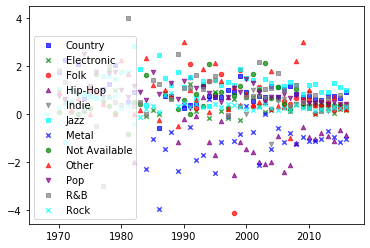

In [0]:
import matplotlib.pyplot as plt

a = song.groupby(["year", "genre"], as_index=False)['avg'].mean()

from mlxtend.plotting import category_scatter

q=category_scatter(x="year", y="avg", data=a, label_col='genre')


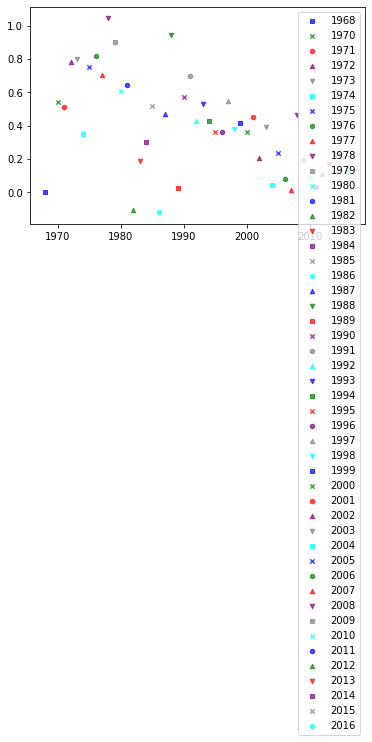

In [0]:
import matplotlib.pyplot as plt

a = song.groupby(["year"], as_index=False)['avg'].mean()

from mlxtend.plotting import category_scatter

q=category_scatter(x="year", y="avg", data=a, label_col='year')